In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats

In [44]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [45]:
boston_df=pd.read_csv(ratings_url)

In [46]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


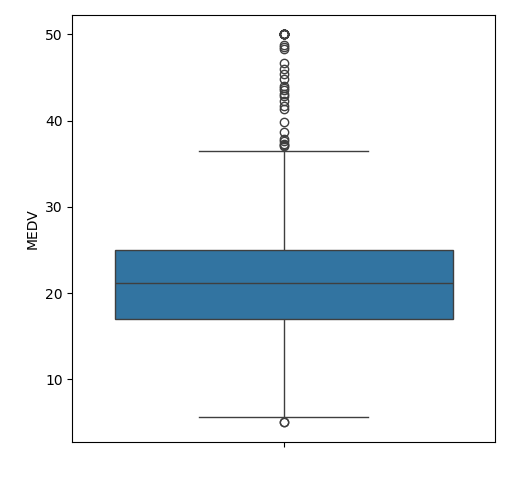

In [47]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.show()

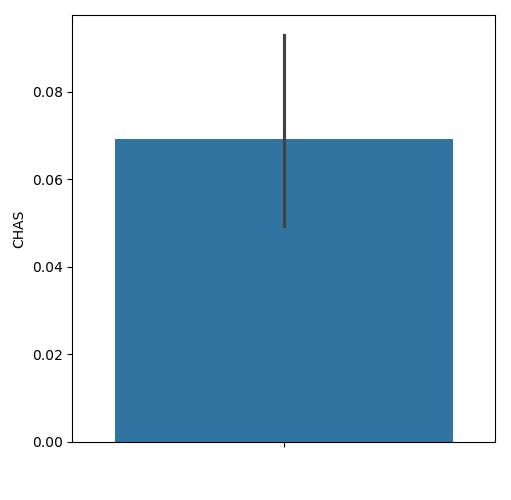

In [48]:
ax=sns.barplot(y='CHAS', data=boston_df)
pyplot.show()

In [49]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '57 years and older'

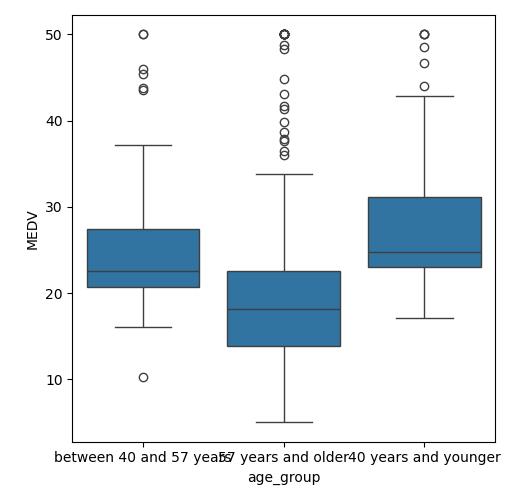

In [50]:
ax=sns.boxplot(x='age_group',y='MEDV',data=boston_df)
pyplot.show()

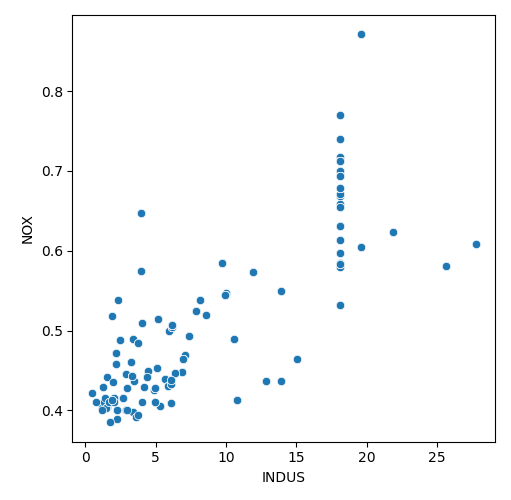

In [51]:
ax=sns.scatterplot(data=boston_df,x='INDUS',y='NOX')
pyplot.show()

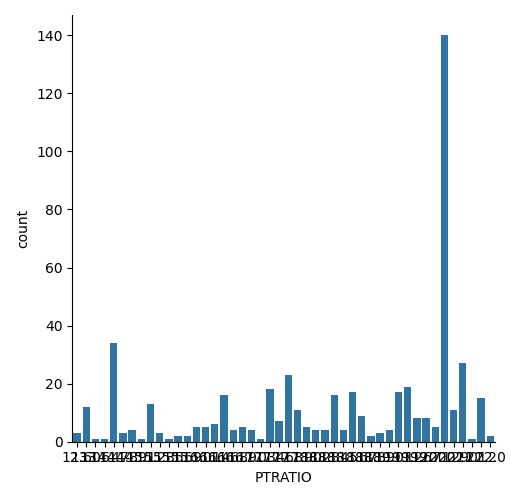

In [52]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
pyplot.show()

In [56]:
#question:Is there a significant difference in median value of houses bounded by the charles river or not?
#null hypothesis= there is no significant difference in median value of houses by the charles river
#alternative hypothesis= there is a significant difference in median value of houses by the charles river
MEDV_CHAS_ttest=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=True)
print(MEDV_CHAS_ttest)
#we reject the null hypothesis as there is significant evidence to prove there is a significant difference in median value of houses by the charles river


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


In [ ]:
#question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#null hypothesis: there is no difference in Median values of houses  for each proportion of owner occupied units built prior to 1940
#alternative hypothesis: there is a difference in Median values of houses  for each proportion of owner occupied units built prior to 1940
#answer=we reject the null hypothesis as there are enough evidence that there is a difference in median values of houses for each proportion of owner occupied unites built prior to 1940


In [59]:
MEDV_age_anova_test=scipy.stats.f_oneway(boston_df['MEDV'],boston_df['AGE'])
print(MEDV_age_anova_test)



F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)


In [60]:
#Question:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#alternative hypothesis:there is a  relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#answer=we fail to reject the null hypothesis as there is significant evidence that there is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

In [61]:
INDUS_NOX_pearson=scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])
print(INDUS_NOX_pearson)

(0.7636514469209189, 7.913361061211254e-98)
